In [1]:
import pandas as pd
import uproot
import cupy as cp
import boost_histogram as bh
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def no_DN (frame):
    
    i = frame.index[0][0]
    new_frame = frame.loc[(frame['isDN'].values == False) & (frame['hitTime'].values < 300)]
    return new_frame.loc[i]

In [3]:
def first (frame):
    frame_sort = frame.sort_values(['hitTime'])
    frame_first = frame_sort.drop_duplicates(subset='pmtID', keep='first')
    frame_last = frame_first.sort_values('hitTime', ascending=False)
    return frame_last

In [4]:
def normal_ft(ev):
    
    mi = ev['hitTime'].min()
    
    a = ev['nHits'].values
    b = ev['pmtID'].values
    c = ev['hitTime'] - mi
    data = {'nHits': a, 'pmtID': b, 'hitTime': c}
        
    norm = pd.DataFrame(data)
    return norm

In [5]:
def save_hist (data, info, n, pre, b):
    
    dst_dir = '/home/centos/prova_E/E8_100log/'
    
    #hist = bh.Histogram(bh.axis.Regular(np.logspace(0, 300, 20), 0, 300))
    
    for i in info['evtID']:
        name = pre+str(i)+'_'+str(b)+'.npy'
        ev = data.pandas.df(entrystart=i, entrystop=i+1)
        try:
            ev_noDN = no_DN(ev)
        except:
            print(i, ': solo dark noise')
            continue
        ev_first = first(ev_noDN)
        ev_norm = normal_ft(ev_first)
        ev_time= ev_norm['hitTime'].values
        #hist.fill(ev_time)
        #array = hist.to_numpy()
        array = np.histogram(ev_time,  bins=np.logspace(np.log10(0.1), np.log10(300), 100))
        time = array[0]
        
        cp.save(dst_dir + name, time)
        #hist.reset()

In [6]:
def call_all (file, a):
    
    data_file = uproot.open(file)
    INFO = data_file['true_info'].pandas.df()
    DATA = data_file["lpmt_hits"]
    
    if file.startswith('/home/centos/FlatComplete'):
        name = 'pos'
        
        INFO_E8 = INFO.loc[(INFO['E'] > 8) & (INFO['E'] < 9) ]
        
    elif file.startswith('/home/centos/ElectronDataset'):
        name = 'el'
        
        INFO_E8 = INFO.loc[(INFO['E'] > 9) & (INFO['E'] < 10) ]
        
    else:
        print('file non riconosciuto')
        
    save_hist(DATA, INFO_E8, 8, name, a)

In [7]:
P0 = "/home/centos/FlatComplete/eplus_hits_dn_0.root"
P1 = "/home/centos/FlatComplete/eplus_hits_dn_1.root"
P2 = "/home/centos/FlatComplete/eplus_hits_dn_2.root"
P3 = "/home/centos/FlatComplete/eplus_hits_dn_3.root"
P4 = "/home/centos/FlatComplete/eplus_hits_dn_4.root"
P5 = "/home/centos/FlatComplete/eplus_hits_dn_5.root"
P6 = "/home/centos/FlatComplete/eplus_hits_dn_6.root"
P7 = "/home/centos/FlatComplete/eplus_hits_dn_7.root"
P8 = "/home/centos/FlatComplete/eplus_hits_dn_8.root"
P9 = "/home/centos/FlatComplete/eplus_hits_dn_9.root"

In [8]:
E0 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_0.root"
E1 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_1.root"
E2 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_2.root"
E3 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_3.root"
E4 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_4.root"
E5 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_5.root"
E6 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_6.root"
E7 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_7.root"
E8 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_8.root"
E9 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_9.root"

In [9]:
call_all(P0, 0)
call_all(E0, 0)
time.strftime("%H") +":"+ time.strftime("%M")

'17:50'

In [10]:
call_all(P1, 1)
call_all(E1, 1)
time.strftime("%H") +":"+ time.strftime("%M")

'18:30'

In [11]:
call_all(P2, 2)
call_all(E2, 2)
time.strftime("%H") +":"+ time.strftime("%M")

'19:04'

In [12]:
call_all(P3, 3)
call_all(E3, 3)
time.strftime("%H") +":"+ time.strftime("%M")

'19:35'

In [13]:
call_all(P4, 4)
call_all(E4, 4)
time.strftime("%H") +":"+ time.strftime("%M")

'20:07'

In [14]:
call_all(P5, 5)
call_all(E5, 5)
time.strftime("%H") +":"+ time.strftime("%M")

'20:40'

In [15]:
call_all(P6, 6)
call_all(E6, 6)
time.strftime("%H") +":"+ time.strftime("%M")

'21:13'

In [16]:
call_all(P7, 7)
call_all(E7, 7)
time.strftime("%H") +":"+ time.strftime("%M")

'21:47'

In [17]:
call_all(P8, 8)
call_all(E8, 8)
time.strftime("%H") +":"+ time.strftime("%M")

'22:18'

In [18]:
call_all(P9, 9)
call_all(E9, 9)
time.strftime("%H") +":"+ time.strftime("%M")

'22:51'

# ------------------------------------------

In [19]:
import os

In [20]:
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [21]:
folder = 'prova_E/E8_100log/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

200057


In [22]:
E8 = np.empty((200057, 99, 1), dtype=cp.float64)
labels_E8 = np.zeros(200057)
folder = 'prova_E/E8_100log/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E8[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (99,1))
    E8[i] = array
    i += 1

<BarContainer object of 99 artists>

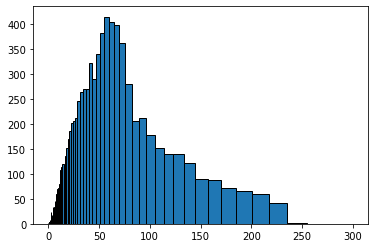

In [27]:
x = np.logspace(np.log10(0.1), np.log10(300), 100)
plt.bar(x[:-1], E8[0].flatten(), width=np.diff(x), ec='black', align='edge')

In [28]:
E8 = E8/E8.max()

In [29]:
from sklearn.model_selection import train_test_split
E8X_train, E8X_test, E8Y_train, E8Y_test = train_test_split(E8 , labels_E8 ,test_size=0.2)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization
from keras import regularizers

model3 = Sequential()
#model1.add(Input(shape=(21,1)))
model3.add(Flatten(input_shape=(99,1)))
model3.add(BatchNormalization())
model3.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [31]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [32]:
history3 = model3.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 9s 58us/step - loss: 0.6899 - accuracy: 0.5335 - val_loss: 0.6849 - val_accuracy: 0.5502
Epoch 2/20
160045/160045 [==============================] - 8s 52us/step - loss: 0.6823 - accuracy: 0.5598 - val_loss: 0.6794 - val_accuracy: 0.5657
Epoch 3/20
160045/160045 [==============================] - 8s 53us/step - loss: 0.6785 - accuracy: 0.5675 - val_loss: 0.6780 - val_accuracy: 0.5686
Epoch 4/20
160045/160045 [==============================] - 8s 52us/step - loss: 0.6756 - accuracy: 0.5741 - val_loss: 0.6745 - val_accuracy: 0.5733
Epoch 5/20
160045/160045 [==============================] - 8s 53us/step - loss: 0.6742 - accuracy: 0.5748 - val_loss: 0.6739 - val_accuracy: 0.5764
Epoch 6/20
160045/160045 [==============================] - 10s 62us/step - loss: 0.6730 - accuracy: 0.5776 - val_loss: 0.6739 - val_accuracy: 0.5758
Epoch 7/20
160045/160045 [============================

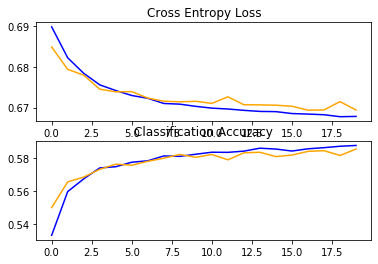

In [33]:
summarize_diagnostics(history3)

In [41]:
model2 = Sequential()
model2.add(Conv1D(32, 100, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(99, 1)))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Conv1D(64, 100, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Conv1D(128, 100, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

In [42]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [43]:
history2 = model2.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=100)

Train on 160045 samples, validate on 40012 samples
Epoch 1/100
160045/160045 [==============================] - 200s 1ms/step - loss: 2.8046 - accuracy: 0.5320 - val_loss: 2.3263 - val_accuracy: 0.5465
Epoch 2/100
160045/160045 [==============================] - 206s 1ms/step - loss: 1.9134 - accuracy: 0.5450 - val_loss: 1.5523 - val_accuracy: 0.5563
Epoch 3/100
160045/160045 [==============================] - 210s 1ms/step - loss: 1.3094 - accuracy: 0.5494 - val_loss: 1.1170 - val_accuracy: 0.5562
Epoch 4/100
160045/160045 [==============================] - 206s 1ms/step - loss: 1.0093 - accuracy: 0.5563 - val_loss: 0.9262 - val_accuracy: 0.5604
Epoch 5/100
160045/160045 [==============================] - 194s 1ms/step - loss: 0.8808 - accuracy: 0.5586 - val_loss: 0.8409 - val_accuracy: 0.5655
Epoch 6/100
160045/160045 [==============================] - 201s 1ms/step - loss: 0.8190 - accuracy: 0.5637 - val_loss: 0.7951 - val_accuracy: 0.5660
Epoch 7/100
160045/160045 [================

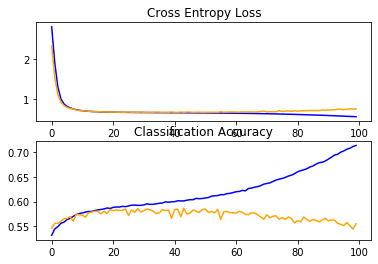

In [44]:
summarize_diagnostics(history2)